# Classification of Breast Cancer using PCA and SVM

### Hanah Chang

## 1. Introduction 

In this proejct, we are joing to first apply a dimension reduction technique, known as principal componenent analysis. Through PCA, we expect to see what variable is important in classifying the target variable and use principal components as input for our classification algorithm. 

The dataset is from (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic) 
Examples of key variables are: 

        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

Our target variable is binary, Malignant or Benign

## 2. Data & Libaray

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [52]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [53]:
print(type(cancer))
print(cancer.keys())
print(cancer['data'].shape)

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
(569, 30)


First let us turn the Bunch-object into a dataframe 

In [54]:
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

In [55]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


## 3. Principal Component Analysis 

By looking at range, we know that our data needs to be scaled. For instance, attribute 'mean area' will intrinsically influence the result more due to its larger value without scaling. 

In [56]:
df_range = pd.DataFrame(df.max() - df.min())
df_range

,0
mean radius,21.129000
mean texture,29.570000
mean perimeter,144.710000
mean area,2357.500000
mean smoothness,0.110770
mean compactness,0.326020
mean concavity,0.426800
mean concave points,0.201200
mean symmetry,0.198000
mean fractal dimension,0.047480


In [57]:
scaled_data = (df-df.min())/(df.max()-df.min())
scaled_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0.0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0.0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0.0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0.0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0.0


In [58]:
x = scaled_data.drop(['target'],axis=1)
y = scaled_data['target']

Now we are going to devide dataset into test/train

In [59]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=123)

In [60]:
print("x_train:", x_train.shape, "y_train:", y_train.shape, "x_test:", x_test.shape, "y_test:", y_test.shape, )

x_train: (455, 30) y_train: (455,) x_test: (114, 30) y_test: (114,)


Now let us instantiate a PCA object, find the principal components using the fit method on x_train, then apply the rotation and dimensionality reduction by calling transform(). By setting argument n_components as 2, we are keeping 2 PCs when creating the PCA object.

In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Now we can transform fitted object into first 2 principal components. We can see that only two variables (2 PCs are left) for our train / test data.

In [62]:
x_pc_train = pca.transform(x_train)
x_pc_test = pca.transform(x_test)

In [63]:
print("x_pc_train", x_pc_train.shape)
print("x_pc_test", x_pc_test.shape)

x_pc_train (455, 2)
x_pc_test (114, 2)


We can see we have a very clear separation of what the malignant tumors look like versus the benign tumors with just two PCs, on training data.

Text(0.5, 1.0, 'Testing Data')

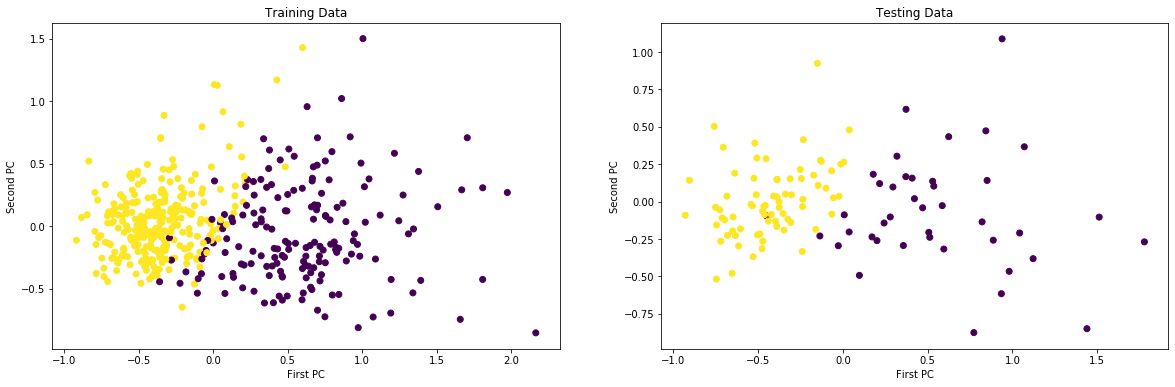

In [64]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.scatter(x_pc_train[:,0],x_pc_train[:,1],c=y_train)
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.title('Training Data')
plt.subplot(1,2,2)
plt.scatter(x_pc_test[:,0],x_pc_test[:,1],c=y_test)
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.title('Testing Data')

After dimensionality reduction, it is very difficult to understand how each feature makes up PC1 and PC2. Instead, we are going to visualize the relationship with a heatmap. 

The heatmap below represents the correlation between the various feature and the principal component itself.

Row 0 represent PC1, and Row 1 represent PC2. And all 30 attributes are listed as columns. The higher the number or color close to yellow is more correlated to a specific feature in the columns. For instance, we can see 'mean fractal dimension' contributes largely on PC2.

In [65]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

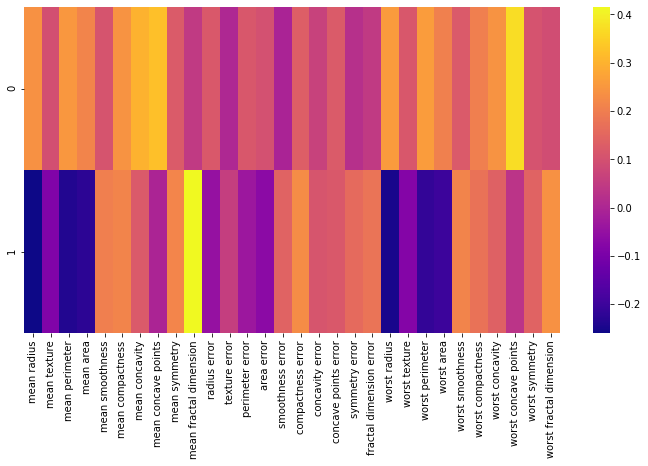

In [66]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

## 4. Support Vector Machine with Principal Components

In [67]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_pc_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

The Confusion matrix below shows 23 cases are misclassified (out of total 455 cases)

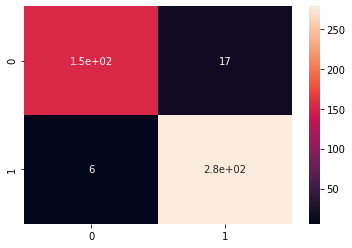

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
y_train_predict = svm.predict(x_pc_train)
cm = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cm, annot=True)

Our model showed 96% of recall and 96% of f1-score when applied to testing data. 

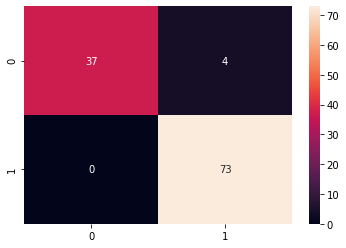

In [69]:
y_test_predict = svm.predict(x_pc_test)
cm2 = confusion_matrix(y_test, y_test_predict)
sns.heatmap(cm2, annot=True)

In [70]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        41
         1.0       0.95      1.00      0.97        73

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



## 5. Conclusion

Our model accurately predicted most of the testing data using PC1 and PC2 as input. 